In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv("Most_Realistic_Indian_E-Commerce_SMB_Dataset.csv")
df

,Store_ID,Platform,Product_Count,Monthly_Revenue,Avg_Discount_%,Return_Rate_%
0,1,OpenCart,307,83309.0,21.65,7.36
1,2,Unicommerce,56,657279.0,19.04,22.14
2,3,Martjack,164,227841.0,18.24,13.46
3,4,Instamojo,141,89650.0,18.96,18.91
4,5,Dukaan,187,597978.0,12.10,15.58
...,...,...,...,...,...,...
2995,2996,Weebly,184,73070.0,15.32,22.63
2996,2997,Shopify,284,413640.0,10.34,1.71
2997,2998,Paytm Mall,148,693137.0,12.66,2.15
2998,2999,Weebly,902,223634.0,22.59,5.14


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Store_ID         3000 non-null   int64  
 1   Platform         3000 non-null   object 
 2   Product_Count    3000 non-null   int64  
 3   Monthly_Revenue  3000 non-null   float64
 4   Avg_Discount_%   3000 non-null   float64
 5   Return_Rate_%    3000 non-null   float64
dtypes: float64(3), int64(2), object(1)
memory usage: 140.8+ KB


In [ ]:
df.describe()

,Store_ID,Product_Count,Monthly_Revenue,Avg_Discount_%,Return_Rate_%
count,3000.000000,3000.000000,3.000000e+03,3000.000000,3000.000000
mean,1500.500000,357.352000,2.674131e+05,13.304777,13.663563
std,866.169729,318.256688,3.118758e+05,7.083735,7.064596
min,1.000000,30.000000,5.000000e+04,0.090000,0.270000
25%,750.750000,114.000000,8.129600e+04,7.770000,8.050000
50%,1500.500000,199.500000,1.655290e+05,12.525000,13.140000
75%,2250.250000,538.250000,3.250595e+05,18.005000,18.890000
max,3000.000000,1199.000000,3.758557e+06,36.630000,33.680000


In [ ]:
drop_columns = ['Store_ID','Platform']
df_clustering = df.drop(columns=drop_columns)

In [ ]:
df_clustering.head()

,Product_Count,Monthly_Revenue,Avg_Discount_%,Return_Rate_%
0,128,1966334,8.13,8.61
1,755,717565,21.39,1.55
2,297,170243,5.99,4.52
3,87,1057378,19.94,4.08
4,88,1897756,26.74,6.87


Text(0.5, 1.0, 'Elbow Method')

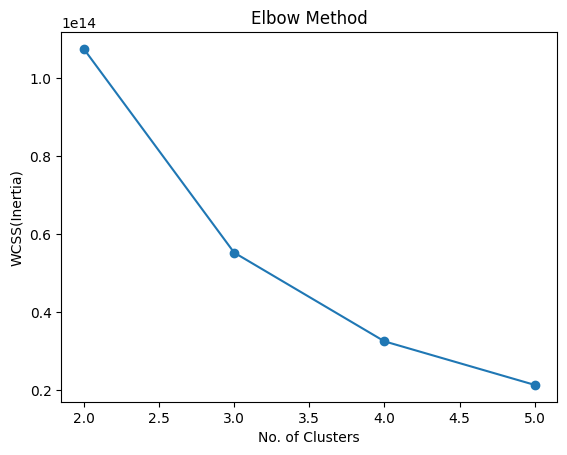

In [ ]:
#elbow method for finding optimum no. of clusters
wcss=[]
for k in range(2,6):
  kmeans=KMeans(n_clusters=k,random_state=42)
  kmeans.fit(df_clustering)
  wcss.append(kmeans.inertia_)

plt.plot(range(2,6),wcss,marker='o')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS(Inertia)')
plt.title('Elbow Method')

In [ ]:
from sklearn.metrics import silhouette_score
for k in range(2,6):
  kmeans=KMeans(n_clusters=k,random_state=42)
  labels=kmeans.fit_predict(df_clustering)
  score=silhouette_score(df_clustering,labels)
  print(f'Silhouette score for K= {k} : {score:.3f}')

Silhouette score for K= 2 : 0.767
Silhouette score for K= 3 : 0.676
Silhouette score for K= 4 : 0.642
Silhouette score for K= 5 : 0.619


In [ ]:
kmeans=KMeans(n_clusters=4, random_state=42) #selecting 4 clusters and clustering
df['Cluster']= kmeans.fit_predict(df_clustering)
df

,Store_ID,Platform,Product_Count,Monthly_Revenue,Avg_Discount_%,Return_Rate_%,Cluster
0,1,OpenCart,307,83309.0,21.65,7.36,3
1,2,Unicommerce,56,657279.0,19.04,22.14,2
2,3,Martjack,164,227841.0,18.24,13.46,3
3,4,Instamojo,141,89650.0,18.96,18.91,3
4,5,Dukaan,187,597978.0,12.10,15.58,0
...,...,...,...,...,...,...,...
2995,2996,Weebly,184,73070.0,15.32,22.63,3
2996,2997,Shopify,284,413640.0,10.34,1.71,0
2997,2998,Paytm Mall,148,693137.0,12.66,2.15,2
2998,2999,Weebly,902,223634.0,22.59,5.14,3


In [ ]:
df['Cluster']= kmeans.labels_

In [ ]:
df.groupby('Cluster')[['Platform']].value_counts(normalize=True)

Cluster  Platform  
0        Kartrocket    0.065734
         Zepo          0.060140
         Volusion      0.055944
         PrestaShop    0.054545
         Instamojo     0.053147
                         ...   
3        PrestaShop    0.046407
         Volusion      0.043413
         Custom        0.042415
         Shopify       0.042415
         Instamojo     0.041916
Name: proportion, Length: 77, dtype: float64

Cluster 0: Moderate Revenue, Moderate Discount, Moderate Returns

Cluster 1: Very High Revenue, Moderately low Discount,  Moderately High Returns

Cluster 2: High Revenue, Moderate Discount, Returns lower thancluster 1

Cluster 3: Low Revenue, Moderate Discount, Moderate Returns

In [ ]:
features= ['Product_Count', 'Monthly_Revenue', 'Avg_Discount_%', 'Return_Rate_%']
X=df_clustering[features]

#apply PCA
pca=PCA(n_components=2)
pca_result= pca.fit_transform(X)
df['PCA1']=pca_result[:,0]
df['PCA2']=pca_result[:,1]

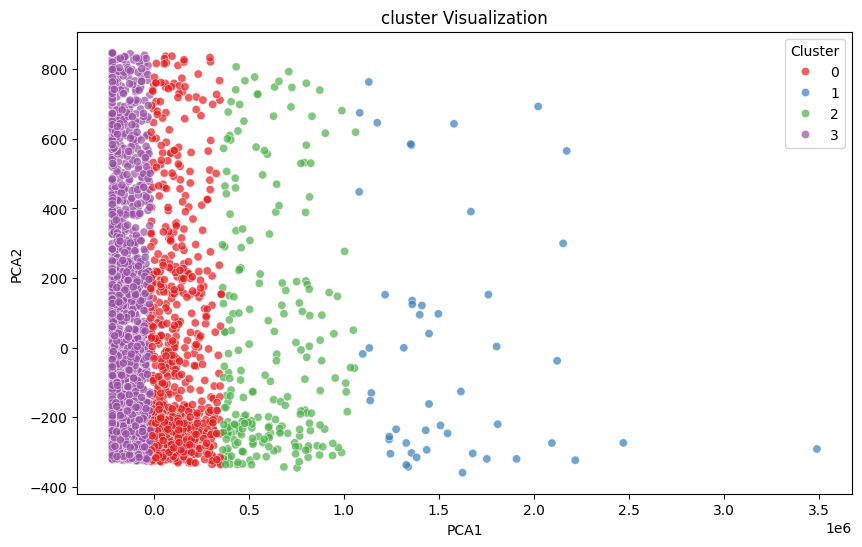

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='PCA1',y='PCA2',hue='Cluster',palette='Set1',alpha=0.7)
plt.title('cluster Visualization')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

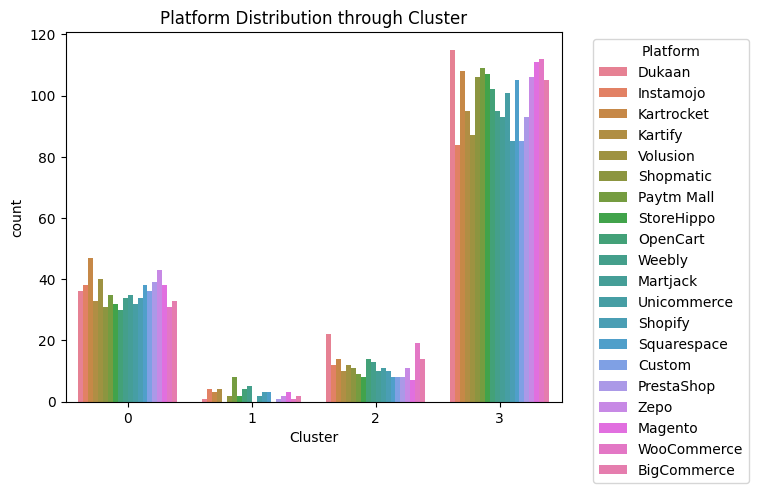

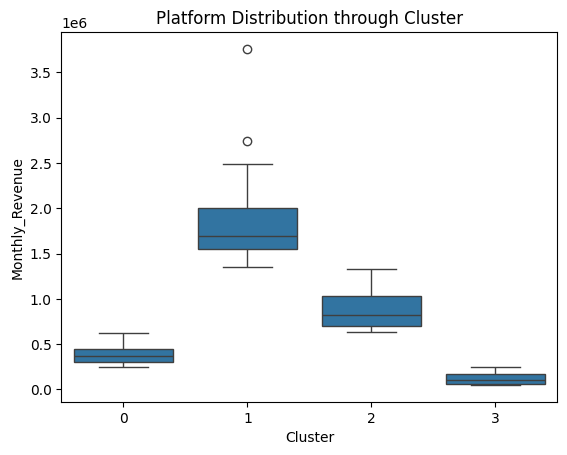

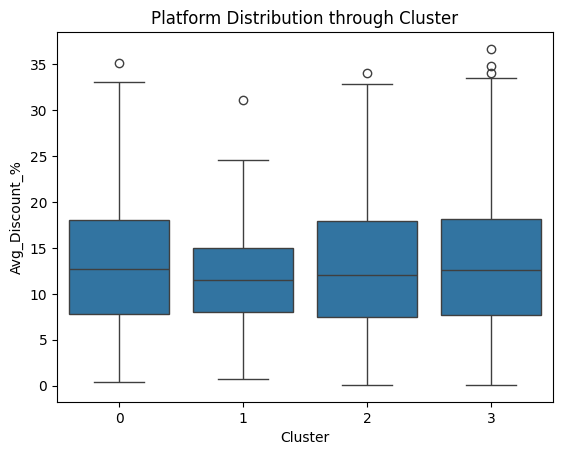

In [ ]:
# Mosaic equivalent (stacked bar for each segment)
sns.countplot(data=df, x='Cluster', hue='Platform')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Platform Distribution through Cluster")
plt.show()

sns.boxplot(data=df, x='Cluster', y='Monthly_Revenue')
plt.title("Platform Distribution through Cluster")
plt.show()

sns.boxplot(data=df, x='Cluster', y='Avg_Discount_%')
plt.title("Platform Distribution through Cluster")
plt.show()
